In [57]:
# Importuojamos reikalingos bibliotekos
import pandas as pd
import numpy as np
from scipy.stats import norm # Naudojamas normaliojo skirstinio grafikui
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load data

In [2]:
# Užkraunami stulpelių pavadinimai
columns = pd.read_csv("data/iris names.txt", names=['names'])
columns

,names
0,sepal length in cm
1,sepal width in cm
2,petal length in cm
3,petal width in cm
4,class


In [3]:
# Užkraunami duomenys bei stulpeliams priskiriami pavadinimai
data = pd.read_csv("data/iris2.data", sep="\t", header=None, names=columns['names'])
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


## 2. Data visualization

In [6]:
# Duomenys išskirstomi į 3 naujus kintamuosius pagal klasės (class) stulpelį
class_1 = data[data['class'] == 1]
class_2 = data[data['class'] == 2]
class_3 = data[data['class'] == 3]

In [7]:
class_1

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [8]:
class_2

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2
55,5.7,2.8,4.5,1.3,2
56,6.3,3.3,4.7,1.6,2
57,4.9,2.4,3.3,1.0,2
58,6.6,2.9,4.6,1.3,2
59,5.2,2.7,3.9,1.4,2


In [9]:
class_3

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
100,6.3,3.3,6.0,2.5,3
101,5.8,2.7,5.1,1.9,3
102,7.1,3.0,5.9,2.1,3
103,6.3,2.9,5.6,1.8,3
104,6.5,3.0,5.8,2.2,3
105,7.6,3.0,6.6,2.1,3
106,4.9,2.5,4.5,1.7,3
107,7.3,2.9,6.3,1.8,3
108,6.7,2.5,5.8,1.8,3
109,7.2,3.6,6.1,2.5,3


In [10]:
# Klasės numerių stulpelis perkeliamas į naują kintamąjį (bus naudojamas palyginimui su klasifikatoriaus prognozuojama verte) 
true_class = data['class']
data = data.drop('class', axis=1)

In [11]:
class_1.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                   int64
dtype: object

In [12]:
# Randamos kiekvienos klasės parametrų mažiausios ir didžiausios vertės
sepal_length_interval_1 = [class_1['sepal length in cm'].min(), class_1['sepal length in cm'].max()]
sepal_width_interval_1 = [class_1['sepal width in cm'].min(), class_1['sepal width in cm'].max()]
petal_length_interval_1 = [class_1['petal length in cm'].min(), class_1['petal length in cm'].max()]
petal_width_interval_1 = [class_1['petal width in cm'].min(), class_1['petal width in cm'].max()]
sepal_length_interval_2 = [class_2['sepal length in cm'].min(), class_2['sepal length in cm'].max()]
sepal_width_interval_2 = [class_2['sepal width in cm'].min(), class_2['sepal width in cm'].max()]
petal_length_interval_2 = [class_2['petal length in cm'].min(), class_2['petal length in cm'].max()]
petal_width_interval_2 = [class_2['petal width in cm'].min(), class_2['petal width in cm'].max()]
sepal_length_interval_3 = [class_3['sepal length in cm'].min(), class_3['sepal length in cm'].max()]
sepal_width_interval_3 = [class_3['sepal width in cm'].min(), class_3['sepal width in cm'].max()]
petal_length_interval_3 = [class_3['petal length in cm'].min(), class_3['petal length in cm'].max()]
petal_width_interval_3 = [class_3['petal width in cm'].min(), class_3['petal width in cm'].max()]

In [13]:
sepal_length_interval_1, sepal_width_interval_1, petal_length_interval_1, petal_width_interval_1

([4.3, 5.8], [2.3, 4.4], [1.0, 1.9], [0.1, 0.6])

In [14]:
sepal_length_interval_2, sepal_width_interval_2, petal_length_interval_2, petal_width_interval_2

([4.9, 7.0], [2.0, 3.4], [3.0, 5.1], [1.0, 1.8])

In [15]:
sepal_length_interval_3, sepal_width_interval_3, petal_length_interval_3, petal_width_interval_3

([4.9, 7.9], [2.2, 3.8], [4.5, 6.9], [1.4, 2.5])

In [16]:
# Gaunamas kiekvienos klasės parametrų verčių vidurkis
sepal_length_mean_1 = class_1['sepal length in cm'].mean()
sepal_width_mean_1 = class_1['sepal width in cm'].mean()
petal_length_mean_1 = class_1['petal length in cm'].mean()
petal_width_mean_1 = class_1['petal width in cm'].mean()
sepal_length_mean_2 = class_2['sepal length in cm'].mean()
sepal_width_mean_2 = class_2['sepal width in cm'].mean()
petal_length_mean_2 = class_2['petal length in cm'].mean()
petal_width_mean_2 = class_2['petal width in cm'].mean()
sepal_length_mean_3 = class_3['sepal length in cm'].mean()
sepal_width_mean_3 = class_3['sepal width in cm'].mean()
petal_length_mean_3 = class_3['petal length in cm'].mean()
petal_width_mean_3 = class_3['petal width in cm'].mean()

In [17]:
sepal_length_mean_1, sepal_width_mean_1, petal_length_mean_1, petal_width_mean_1

(5.006, 3.418, 1.464, 0.244)

In [18]:
sepal_length_mean_2, sepal_width_mean_2, petal_length_mean_2, petal_width_mean_2

(5.936, 2.7700000000000005, 4.26, 1.3259999999999998)

In [19]:
sepal_length_mean_3, sepal_width_mean_3, petal_length_mean_3, petal_width_mean_3

(6.587999999999998, 2.974, 5.5520000000000005, 2.0260000000000002)

In [20]:
# Gaunamas kiekvienos klasės parametrų verčių standartinis nuokrypis
sepal_length_std_1 = class_1['sepal length in cm'].std()
sepal_width_std_1 = class_1['sepal width in cm'].std()
petal_length_std_1 = class_1['petal length in cm'].std()
petal_width_std_1 = class_1['petal width in cm'].std()
sepal_length_std_2 = class_2['sepal length in cm'].std()
sepal_width_std_2 = class_2['sepal width in cm'].std()
petal_length_std_2 = class_2['petal length in cm'].std()
petal_width_std_2 = class_2['petal width in cm'].std()
sepal_length_std_3 = class_3['sepal length in cm'].std()
sepal_width_std_3 = class_3['sepal width in cm'].std()
petal_length_std_3 = class_3['petal length in cm'].std()
petal_width_std_3 = class_3['petal width in cm'].std()

In [21]:
sepal_length_std_1, sepal_width_std_1, petal_length_std_1, petal_width_std_1

(0.35248968721345136,
 0.38102439795469095,
 0.17351115943644546,
 0.1072095030816784)

In [22]:
sepal_length_std_2, sepal_width_std_2, petal_length_std_2, petal_width_std_2

(0.5161711470638634,
 0.3137983233784114,
 0.46991097723995795,
 0.19775268000454405)

In [23]:
sepal_length_std_3, sepal_width_std_3, petal_length_std_3, petal_width_std_3

(0.6358795932744322,
 0.32249663817263746,
 0.5518946956639834,
 0.2746500556366674)

# 2. Draw plots

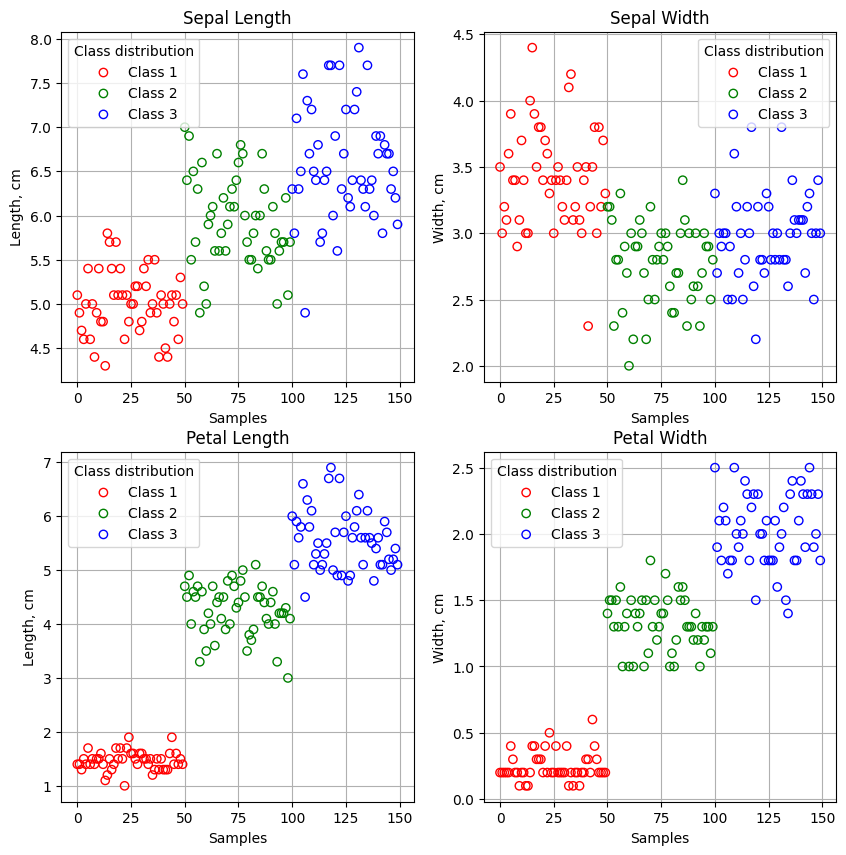

In [24]:
# Nubraižomas kiekvienos klasės parametrų pasiskirstymo grafikas
def draw_plots(df_1, df_2, df_3, rows, cols):
    # df_1 - dataframe of class 1
    # df_2 - dataframe of class 2
    # df_3 - dataframe of class 3
    # rows - row count of a plot group
    # cols - column count of a plot group
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,10))
    columns = df_1.columns.to_list()
    c = 0
    for i in range(rows):
        for j in range(cols):
            ax[i,j].scatter(x=df_1[columns[c]].index, y=df_1[columns[c]], facecolors='none', edgecolors='red')
            ax[i,j].scatter(x=df_2[columns[c]].index, y=df_2[columns[c]], facecolors='none', edgecolors='green')
            ax[i,j].scatter(x=df_3[columns[c]].index, y=df_3[columns[c]], facecolors='none', edgecolors='blue')
            ax[i,j].grid(which='Major', axis='both')
            ax[i,j].set(title=f"{' '.join(columns[c].split()[:2]).title()}",
                        xlabel="Samples",
                        axisbelow=True)
            ax[i,j].set(ylabel="Length, cm") if j/2 == 0 else ax[i,j].set(ylabel="Width, cm")
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"], title="Class distribution")
            c += 1
    fig.savefig("images/parameter_distribution.png")
draw_plots(class_1, class_2, class_3, 2, 2)

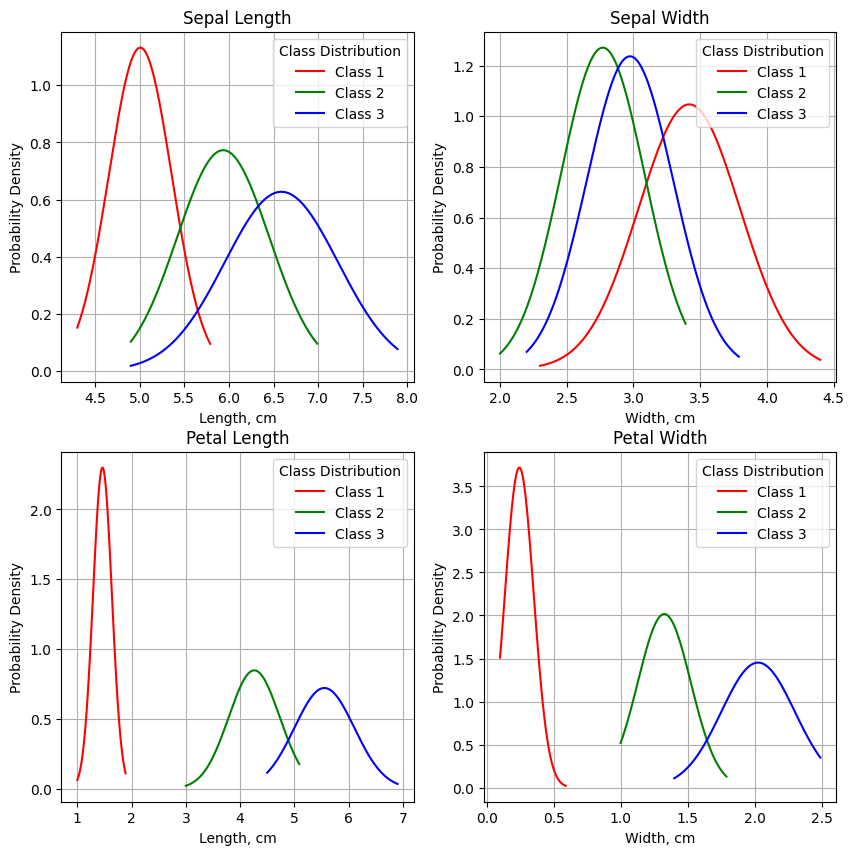

In [25]:
"""Nubraižomi kiekvieno parametro normalaus pasiskirstymo grafikai. Parametrai išskirstyti į 3 grupes pagal augalo klasę"""
# Apskaičiuojamos kiekvieno parametro statistinės metrikos - min ir max vertės,  
param1 = [sepal_length_interval_1, sepal_length_interval_2, sepal_length_interval_3,
          sepal_length_mean_1, sepal_length_mean_2, sepal_length_mean_3,
          sepal_length_std_1, sepal_length_std_2, sepal_length_std_3]
param2 = [sepal_width_interval_1, sepal_width_interval_2, sepal_width_interval_3,
          sepal_width_mean_1, sepal_width_mean_2, sepal_width_mean_3,
          sepal_width_std_1, sepal_width_std_2, sepal_width_std_3]
param3 = [petal_length_interval_1, petal_length_interval_2, petal_length_interval_3,
          petal_length_mean_1, petal_length_mean_2, petal_length_mean_3,
          petal_length_std_1, petal_length_std_2, petal_length_std_3]
param4 = [petal_width_interval_1, petal_width_interval_2, petal_width_interval_3,
          petal_width_mean_1, petal_width_mean_2, petal_width_mean_3,
          petal_width_std_1, petal_width_std_2, petal_width_std_3]
def distribution_graph(param1, param2, param3, param4, rows, cols, names=columns['names'].values.tolist()):
    # param1 - sepal length statistics for every class (min, max, mean, std)
    # param2 - sepal width statistics for every class (min, max, mean, std)
    # param3 - petal length statistics for every class (min, max, mean, std)
    # param4 - petal width statistics for every class (min, max, mean, std)
    # rows - row count for a plot group
    # cols - column count for a plot group
    # names - column names
    c = 0
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,10))
    for i in range(rows):
        for j in range(cols):
            if c == 0:
                arg = param1
            elif c == 1:
                arg = param2
            elif c == 2:
                arg = param3
            elif c == 3:
                arg = param4
            x_1 = np.arange(arg[0][0], arg[0][1], 0.01)
            x_2 = np.arange(arg[1][0], arg[1][1], 0.01)
            x_3 = np.arange(arg[2][0], arg[2][1], 0.01)
            ax[i,j].plot(x_1, norm.pdf(x_1, arg[3], arg[6]), c='red')
            ax[i,j].plot(x_2, norm.pdf(x_2, arg[4], arg[7]), c='green')
            ax[i,j].plot(x_3, norm.pdf(x_3, arg[5], arg[8]), c='blue')
            ax[i,j].set(title=f"{' '.join(names[c].split()[:2]).title()}",
                        ylabel="Probability Density",
                        axisbelow=True)
            ax[i,j].set(xlabel="Length, cm") if j/2 == 0 else ax[i,j].set(xlabel="Width, cm")
            ax[i,j].grid(which='Major',
                         axis='both')
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"],
                           title="Class Distribution",
                           loc="upper right")
            c += 1
    fig.savefig("images/normal_distribution.png")
distribution_graph(param1, param2, param3, param4, 2, 2)

# 3. Functions

In [26]:
# Augalų klasifikavimas naudojant if sąlygas ir min max vertes
def classifier_1(df, sli1, sli2, sli3, swi1, swi2, swi3, pli1, pli2, pli3, pwi1, pwi2, pwi3):
    # sli1[0] - min sepal length in cm for class 1
    # sli1[1] - max sepal length in cm for class 1
    # sli2[0] - min sepal length in cm for class 2
    # sli2[1] - max sepal length in cm for class 2
    # sli3[0] - min sepal length in cm for class 3
    # sli3[1] - max sepal length in cm for class 3
    # swi1[0] - min sepal width in cm for class 1
    # swi1[1] - max sepal width in cm for class 1
    # swi2[0] - min sepal width in cm for class 2
    # swi2[1] - max sepal width in cm for class 2
    # swi3[0] - min sepal width in cm for class 3
    # swi3[1] - max sepal width in cm for class 3
    # pli1[0] - min petal length in cm for class 1
    # pli1[1] - max petal length in cm for class 1
    # pli2[0] - min petal length in cm for class 2
    # pli2[1] - max petal length in cm for class 2
    # pli3[0] - min petal length in cm for class 3
    # pli3[1] - max petal length in cm for class 3
    # pwi1[0] - min petal width in cm for class 1
    # pwi1[1] - max petal width in cm for class 1
    # pwi2[0] - min petal width in cm for class 2
    # pwi2[1] - max petal width in cm for class 2
    # pwi3[0] - min petal width in cm for class 3
    # pwi3[1] - max petal width in cm for class 3
    predictions = []
    for i in df.index:
        if df['sepal length in cm'][i] >= sli1[0] and df['sepal length in cm'][i] <= sli1[1] and \
            df['sepal width in cm'][i] >= swi1[0] and df['sepal width in cm'][i] <= swi1[1] and \
            df['petal length in cm'][i] >= pli1[0] and df['petal length in cm'][i] <= pli1[1] and \
            df['petal width in cm'][i] >= pwi1[0] and df['petal width in cm'][i] <= pwi1[1]:
            predictions.append(1)
        elif df['sepal length in cm'][i] >= sli2[0] and df['sepal length in cm'][i] <= sli2[1] and \
            df['sepal width in cm'][i] >= swi2[0] and df['sepal width in cm'][i] <= swi2[1] and \
            df['petal length in cm'][i] >= pli2[0] and df['petal length in cm'][i] <= pli2[1] and \
            df['petal width in cm'][i] >= pwi2[0] and df['petal width in cm'][i] <= pwi2[1]:
            predictions.append(2)
        elif df['sepal length in cm'][i] >= sli3[0] and df['sepal length in cm'][i] <= sli3[1] and \
            df['sepal width in cm'][i] >= swi3[0] and df['sepal width in cm'][i] <= swi3[1] and \
            df['petal length in cm'][i] >= pli3[0] and df['petal length in cm'][i] <= pli3[1] and \
            df['petal width in cm'][i] >= pwi3[0] and df['petal width in cm'][i] <= pwi3[1]:
            predictions.append(3)
    new_df = pd.DataFrame(predictions, columns=['predicted_class'])
    new_df.insert(1, "true_class", true_class, True)
    return new_df

In [27]:
# Augalų klasifikavimas naudojant if sąlygas ir vidurkį bei standartinį nuokrypį
def classifier_2(df, slm1, swm1, plm1, pwm1, sls1, sws1, pls1, pws1,
                     slm2, swm2, plm2, pwm2, sls2, sws2, pls2, pws2,
                     slm3, swm3, plm3, pwm3, sls3, sws3, pls3, pws3):
    # slm1 - mean of sepal length in cm for class 1
    # sls1 - standard deviation of sepal length in cm for class 1
    # swm1 - mean of sepal width in cm for class 1
    # sws1 - standard deviation of width length in cm for class 1
    # plm1 - mean of petal length in cm for class 1
    # pls1 - standard deviation of petal length in cm for class 1
    # pwm1 - mean of petal width in cm for class 1
    # pws1 - standard deviation of petal width in cm for class 1
    # slm2 - mean of sepal length in cm for class 2
    # sls2 - standard deviation of sepal length in cm for class 2
    # swm2 - mean of sepal width in cm for class 2
    # sws2 - standard deviation of width length in cm for class 2
    # plm2 - mean of petal length in cm for class 2
    # pls2 - standard deviation of petal length in cm for class 2
    # pwm2 - mean of petal width in cm for class 2
    # pws2 - standard deviation of petal width in cm for class 2
    # slm3 - mean of sepal length in cm for class 3
    # sls3 - standard deviation of sepal length in cm for class 3
    # swm3 - mean of sepal width in cm for class 3
    # sws3 - standard deviation of width length in cm for class 3
    # plm3 - mean of petal length in cm for class 3
    # pls3 - standard deviation of petal length in cm for class 3
    # pwm3 - mean of petal width in cm for class 3
    # pws3 - standard deviation of petal width in cm for class 3
    predictions = []
    for i in df.index:
        if df['sepal length in cm'][i] >= slm1-3*sls1 and df['sepal length in cm'][i] <= slm1+3*sls1 and \
            df['sepal width in cm'][i] >= swm1-3*sws1 and df['sepal width in cm'][i] <= swm1+3*sws1 and \
            df['petal length in cm'][i] >= plm1-3*pls1 and df['petal length in cm'][i] <= plm1+3*pls1 and \
            df['petal width in cm'][i] >= pwm1-3*pws1 and df['petal width in cm'][i] <= pwm1+3*pws1:
            predictions.append(1)
        elif df['sepal length in cm'][i] >= slm2-3*sls2 and df['sepal length in cm'][i] <= slm2+3*sls2 and \
            df['sepal width in cm'][i] >= swm2-3*sws2 and df['sepal width in cm'][i] <= swm2+3*sws2 and \
            df['petal length in cm'][i] >= plm2-3*pls2 and df['petal length in cm'][i] <= plm2+3*pls2 and \
            df['petal width in cm'][i] >= pwm2-3*pws2 and df['petal width in cm'][i] <= pwm2+3*pws2:
            predictions.append(2)
        elif df['sepal length in cm'][i] >= slm3-3*sls3 and df['sepal length in cm'][i] <= slm3+3*sls3 and \
            df['sepal width in cm'][i] >= swm3-3*sws3 and df['sepal width in cm'][i] <= swm3+3*sws3 and \
            df['petal length in cm'][i] >= plm3-3*pls3 and df['petal length in cm'][i] <= plm3+3*pls3 and \
            df['petal width in cm'][i] >= pwm3-3*pws3 and df['petal width in cm'][i] <= pwm3+3*pws3:
            predictions.append(3)
    new_df = pd.DataFrame(predictions, columns=['predicted_class'])
    new_df.insert(1, "true_class", true_class, True)
    return new_df

In [28]:
# Skaičiuojamas klasifikavimo klaidų kiekis
def count_errors(df):
    TP,TN,FP,FN = [0 for x in range(4)]
    for i in df.index:
        if df['predicted_class'][i] == df['true_class'][i]:
            TP += 1
            TN += 2
        else:
            FP += 1
            FN += 1
    P = len(df)
    N = 2*len(df)
    return [TP,TN,FP,FN,P,N]

In [29]:
def print_errors(df, name):
    TP,TN,FP,FN,P,N = count_errors(df)
    print(f"\n ------------------------")
    print(f"| {name} |")
    print(f" ------------------------")
    print(f"[+] TP: {TP}")
    print(f"[+] TN: {TN}")
    print(f"[+] FP: {FP}")
    print(f"[+] FN: {FN}")
    print(f"[+] P: {P}")
    print(f"[+] N: {N}")

In [30]:
# Skaičiuojamos klasifikavimo metrikos: tikslumas, jautrumas, precizija ir Matthew koeficientas
def calculate_metrics(df):
    TP,TN,FP,FN,P,N = count_errors(df)
    accuracy = (TP + TN) / (P + N)
    sensitivity = TP / P
    precision = TP / (TP + FP)
    mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    return [accuracy,sensitivity,precision,mcc]

In [31]:
def print_metrics(df, name):
    accuracy,sensitivity,precision,mcc = calculate_metrics(df)
    print(f"\n --------------------------")
    print(f"| {name} |")
    print(f" --------------------------")
    print(f"[+] Accuracy: {accuracy*100:.2f}%")
    print(f"[+] Sensitivity: {sensitivity*100:.2f}%")
    print(f"[+] Precision: {precision*100:.2f}%")
    print(f"[+] Matthew coefficient: {mcc*100:.2f}%")

# 4. IF Method

In [32]:
# Klasifikavimas pirmuoju metodu
classified_df_1 = classifier_1(data,
                                sepal_length_interval_1, sepal_length_interval_2, sepal_length_interval_3,
                                sepal_width_interval_1, sepal_width_interval_2, sepal_width_interval_3,
                                petal_length_interval_1, petal_length_interval_2, petal_length_interval_3,
                                petal_width_interval_1, petal_width_interval_2, petal_width_interval_3)
classified_df_1

,predicted_class,true_class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
145,3,3
146,3,3
147,3,3
148,3,3


In [33]:
# Pirmojo metodo klasifikavimo klaidos
print_errors(classified_df_1, "Stats for classifier 1")


 ------------------------
| Stats for classifier 1 |
 ------------------------
[+] TP: 142
[+] TN: 284
[+] FP: 8
[+] FN: 8
[+] P: 150
[+] N: 300


In [34]:
# Pirmojo metodo klasifikavimo metrikos
print_metrics(classified_df_1, "Metrics for classifier 1")


 --------------------------
| Metrics for classifier 1 |
 --------------------------
[+] Accuracy: 94.67%
[+] Sensitivity: 94.67%
[+] Precision: 94.67%
[+] Matthew coefficient: 91.93%


# 5. Statistical method

In [35]:
# Klasifikavimas antruoju metodu
classified_df_2 = classifier_2(data,
                               sepal_length_mean_1,
                               sepal_width_mean_1,
                               petal_length_mean_1,
                               petal_width_mean_1,
                               sepal_length_std_1,
                               sepal_width_std_1,
                               petal_length_std_1,
                               petal_width_std_1,
                               sepal_length_mean_2,
                               sepal_width_mean_2,
                               petal_length_mean_2,
                               petal_width_mean_2,
                               sepal_length_std_2,
                               sepal_width_std_2,
                               petal_length_std_2,
                               petal_width_std_2,
                               sepal_length_mean_3,
                               sepal_width_mean_3,
                               petal_length_mean_3,
                               petal_width_mean_3,
                               sepal_length_std_3,
                               sepal_width_std_3,
                               petal_length_std_3,
                               petal_width_std_3
)
classified_df_2

,predicted_class,true_class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
144,3,3
145,2,3
146,3,3
147,3,3


In [36]:
# Antrojo metodo klasifikavimo klaidos
print_errors(classified_df_2, "Stats for classifier 2")


 ------------------------
| Stats for classifier 2 |
 ------------------------
[+] TP: 131
[+] TN: 262
[+] FP: 18
[+] FN: 18
[+] P: 149
[+] N: 298


In [37]:
# Antrojo metodo klasifikavimo metrikos
print_metrics(classified_df_2, "Metrics for classifier 2")


 --------------------------
| Metrics for classifier 2 |
 --------------------------
[+] Accuracy: 87.92%
[+] Sensitivity: 87.92%
[+] Precision: 87.92%
[+] Matthew coefficient: 81.49%


In [55]:
# KNN classifier
def classifier_3():
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    x = data
    y = true_class
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    model_name = "K-Nearest Neighbor Classifier"
    knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn_model = Pipeline(steps=[('preprocessor', preprocessorForFeatures), ('classifier' , knnClassifier)])
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    return y_pred

In [58]:
y_pred = classifier_3()

NameError: name 'preprocessorForFeatures' is not defined

In [45]:
x_train

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [46]:
x_test

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.1,1.5,0.1
138,6.0,3.0,4.8,1.8
87,6.3,2.3,4.4,1.3
42,4.4,3.2,1.3,0.2
8,4.4,2.9,1.4,0.2
90,5.5,2.6,4.4,1.2


In [47]:
y_train

130    3
119    3
29     1
0      1
62     2
      ..
17     1
98     2
66     2
126    3
109    3
Name: class, Length: 120, dtype: int64

In [48]:
y_test

72     2
112    3
132    3
88     2
37     1
138    3
87     2
42     1
8      1
90     2
141    3
33     1
59     2
116    3
135    3
104    3
36     1
13     1
63     2
45     1
28     1
133    3
24     1
127    3
46     1
20     1
31     1
121    3
117    3
4      1
Name: class, dtype: int64